In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


file_folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/regression_data/filled_zero/'
data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'

df = pd.read_csv(
        file_folder + 'cny_weekly_data.csv')

df.rename(columns={'Location': 'province'}, inplace=True)
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,total_demand_lag_m1,total_demand_lag_m2,total_demand_lag_m3,total_demand_lag_m4,total_demand_lag_1,...,diff_cny_ex_rate,diff_cny_ex_rate_1,diff_cny_ex_rate_2,diff_cny_ex_rate_3,diff_cny_ex_rate_$,diff_cny_ex_rate_4,fake_date,month,quarter,year
0,Ang Thong,2017-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,2017-01,2017-01,2017
1,Ang Thong,2017-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.027567,NaN,NaN,NaN,NaN,NaN,2017-01-08,2017-01,2017-01,2017
2,Ang Thong,2017-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005260,-0.027567,NaN,NaN,NaN,NaN,2017-01-15,2017-01,2017-01,2017
3,Ang Thong,2017-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.009760,0.005260,-0.027567,NaN,NaN,NaN,2017-01-22,2017-01,2017-01,2017
4,Ang Thong,2017-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.026380,-0.009760,0.005260,-0.027567,NaN,NaN,2017-01-29,2017-01,2017-01,2017


## remove linear trend

In [3]:
from sklearn.linear_model import LinearRegression

In [20]:
# wv_data_file = 'wv_cases1'
# df = wv1
df['demand_shock'] = None

for prov in df.province.unique():
    prov_row_idx = df[df.province==prov].index 
    demand_data_points = df.loc[prov_row_idx, 'total_demand'].values
    std_demand = np.std(demand_data_points)
    df.loc[[0, 1], 'demand_shock'] = np.nan # need at least two points to fit a line
    
#     i = 0
    for time_pointer in range(2, len(prov_row_idx)):
        y = demand_data_points[:time_pointer]
        x = np.arange(time_pointer).reshape(-1, 1)
        reg = LinearRegression().fit(x, y)
        expected_demand = max(reg.predict(np.matrix(time_pointer)), 0)
        demand_shock = expected_demand - demand_data_points[time_pointer]
#         print(x, y, expected_demand, demand_shock)
        df.loc[prov_row_idx[time_pointer], 'demand_shock'] = demand_shock/std_demand

#         i+=1
#         if i>3: break

    
print(df.shape)


(7685, 35)


In [21]:

    # create placeholder
for offset in range(1, 9):
    df['demand_shock_plus_%s' % offset] = None
# shift IV the other way by up to 2 months    
for offset in range(1, 9):
    df['demand_shock_minus_%s' % offset] = None

for prov in df.province.unique():
    prov_row_idx = df[df.province==prov].index 

    for offset in range(1, 9):
        df.loc[prov_row_idx, 'demand_shock_plus_%s' % offset] = df.loc[prov_row_idx, 'demand_shock'].shift(offset)
    # shift IV the other way by up to 2 months    
    for offset in range(1, 9):
        df.loc[prov_row_idx, 'demand_shock_minus_%s' % offset] = df.loc[prov_row_idx, 'demand_shock'].shift(-offset)

print(df.shape)

(7685, 51)


In [22]:
df.iloc[10:20, :30]

,province,year_week,total_demand,perc_abuse,wv_count,total_demand_lag_m1,total_demand_lag_m2,total_demand_lag_m3,total_demand_lag_m4,total_demand_lag_1,...,log_total_demand_lag_3,log_total_demand_lag_4,ex_rate,cny_ex_rate,diff_cny_ex_rate,diff_cny_ex_rate_1,diff_cny_ex_rate_2,diff_cny_ex_rate_3,diff_cny_ex_rate_$,diff_cny_ex_rate_4
10,Ang Thong,2017-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35.354280,5.168760,0.005940,0.007880,-0.006880,-0.00738,5.179780,-0.01102
11,Ang Thong,2017-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,34.858060,5.100940,-0.067820,0.005940,0.007880,-0.00688,5.108320,-0.00738
12,Ang Thong,2017-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,34.629220,5.074260,-0.026680,-0.067820,0.005940,0.00788,5.081140,-0.00688
13,Ang Thong,2017-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,34.611325,5.064800,-0.009460,-0.026680,-0.067820,0.00594,5.056920,0.00788
14,Ang Thong,2017-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,34.750667,5.072200,0.007400,-0.009460,-0.026680,-0.06782,5.066260,0.00594
15,Ang Thong,2017-16,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0.0,0.0,34.525120,5.059300,-0.012900,0.007400,-0.009460,-0.02668,5.127120,-0.06782
16,Ang Thong,2017-17,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,...,0.0,0.0,34.619600,5.060420,0.001120,-0.012900,0.007400,-0.00946,5.087100,-0.02668
17,Ang Thong,2017-18,0.0,0.0,0.0,0.0,50.0,0.0,10.0,0.0,...,0.0,0.0,34.711325,5.074125,0.013705,0.001120,-0.012900,0.00740,5.083585,-0.00946
18,Ang Thong,2017-19,0.0,0.0,0.0,50.0,0.0,10.0,0.0,0.0,...,0.0,0.0,34.881025,5.093825,0.019700,0.013705,0.001120,-0.01290,5.086425,0.00740
19,Ang Thong,2017-20,50.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,34.689920,5.077300,-0.016525,0.019700,0.013705,0.00112,5.090200,-0.01290


In [23]:
df.iloc[10:20, 30:]

,fake_date,month,quarter,year,demand_shock,demand_shock_plus_1,demand_shock_plus_2,demand_shock_plus_3,demand_shock_plus_4,demand_shock_plus_5,...,demand_shock_plus_7,demand_shock_plus_8,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8
10,2017-03-12,2017-03,2017-02,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2017-03-19,2017-03,2017-02,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-5.0519
12,2017-03-26,2017-03,2017-02,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.0519,1.01038
13,2017-04-02,2017-04,2017-02,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-5.0519,1.01038,-0.120283
14,2017-04-09,2017-04,2017-02,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,-5.0519,1.01038,-0.120283,0.971014
15,2017-04-16,2017-04,2017-02,2017,0,0,0,0,0,0,...,0,0,0,0,0,-5.0519,1.01038,-0.120283,0.971014,0.862616
16,2017-04-23,2017-04,2017-02,2017,0,0,0,0,0,0,...,0,0,0,0,-5.0519,1.01038,-0.120283,0.971014,0.862616,0.768767
17,2017-04-30,2017-04,2017-02,2017,0,0,0,0,0,0,...,0,0,0,-5.0519,1.01038,-0.120283,0.971014,0.862616,0.768767,0.687058
18,2017-05-07,2017-05,2017-02,2017,0,0,0,0,0,0,...,0,0,-5.0519,1.01038,-0.120283,0.971014,0.862616,0.768767,0.687058,0.615554
19,2017-05-14,2017-05,2017-02,2017,-5.0519,0,0,0,0,0,...,0,0,1.01038,-0.120283,0.971014,0.862616,0.768767,0.687058,0.615554,0.552686


In [24]:
def yr_wk_to_float(yr_wk):
    yr, wk = yr_wk.split('-')
    return int(yr) + float(wk)/100

df['yr_wk_float'] = df.year_week.apply(yr_wk_to_float)

In [25]:
df.to_csv(
    data_dir + 'regression_data_ilm1_causal_detrend_20210204.csv', 
    index=False)
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,total_demand_lag_m1,total_demand_lag_m2,total_demand_lag_m3,total_demand_lag_m4,total_demand_lag_1,...,demand_shock_plus_8,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float
0,Ang Thong,2017-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,2017.01
1,Ang Thong,2017-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,2017.02
2,Ang Thong,2017-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,2017.03
3,Ang Thong,2017-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,2017.04
4,Ang Thong,2017-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,0,0,0,2017.05


In [26]:
df.columns

Index(['province', 'year_week', 'total_demand', 'perc_abuse', 'wv_count',
       'total_demand_lag_m1', 'total_demand_lag_m2', 'total_demand_lag_m3',
       'total_demand_lag_m4', 'total_demand_lag_1', 'total_demand_lag_2',
       'total_demand_lag_3', 'total_demand_lag_4', 'log_total_demand',
       'log_total_demand_lag_m1', 'log_total_demand_lag_m2',
       'log_total_demand_lag_m3', 'log_total_demand_lag_m4',
       'log_total_demand_lag_1', 'log_total_demand_lag_2',
       'log_total_demand_lag_3', 'log_total_demand_lag_4', 'ex_rate',
       'cny_ex_rate', 'diff_cny_ex_rate', 'diff_cny_ex_rate_1',
       'diff_cny_ex_rate_2', 'diff_cny_ex_rate_3', 'diff_cny_ex_rate_$',
       'diff_cny_ex_rate_4', 'fake_date', 'month', 'quarter', 'year',
       'demand_shock', 'demand_shock_plus_1', 'demand_shock_plus_2',
       'demand_shock_plus_3', 'demand_shock_plus_4', 'demand_shock_plus_5',
       'demand_shock_plus_6', 'demand_shock_plus_7', 'demand_shock_plus_8',
       'demand_shock_minus

## IV 

In [29]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/China/'
iv = pd.read_csv(folder + 'weekly_CNY_exchange_rate.csv')
print(iv.year_week.max(), iv.year_week.min(), iv.shape)
iv.head()


2020-47 2017-01 (203, 3)


,year_week,ex_rate,fake_date
0,2017-01,5.248467,2017-01-01
1,2017-02,5.220900,2017-01-08
2,2017-03,5.226160,2017-01-15
3,2017-04,5.216400,2017-01-22
4,2017-05,5.190020,2017-01-29


In [30]:
iv['month'] = iv['fake_date'].apply(lambda x: x[:-3])
iv['quarter'] = iv['fake_date'].apply(lambda x: x[:5] + str((int(x[5:7])-1)//3 + 1))
iv['ex_rate_diff'] = iv['ex_rate'] - iv['ex_rate'].shift(1)
# shift IV by up to 2 months
for offset in range(1, 9):
    iv['ex_rate_diff_plus_%s' % offset] = iv['ex_rate_diff'].shift(offset)
# shift IV the other way by up to 2 months    
for offset in range(1, 9):
    iv['ex_rate_diff_minus_%s' % offset] = iv['ex_rate_diff'].shift(-offset)
#     iv['ex_rate_diff_%s' % offset] = iv['ex_rate'] - iv['ex_rate'].shift(-offset)    
iv.head()

,year_week,ex_rate,fake_date,month,quarter,ex_rate_diff,ex_rate_diff_plus_1,ex_rate_diff_plus_2,ex_rate_diff_plus_3,ex_rate_diff_plus_4,...,ex_rate_diff_plus_7,ex_rate_diff_plus_8,ex_rate_diff_minus_1,ex_rate_diff_minus_2,ex_rate_diff_minus_3,ex_rate_diff_minus_4,ex_rate_diff_minus_5,ex_rate_diff_minus_6,ex_rate_diff_minus_7,ex_rate_diff_minus_8
0,2017-01,5.248467,2017-01-01,2017-01,2017-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.027567,0.00526,-0.00976,-0.02638,-0.00980,-0.01102,-0.00738,-0.00688
1,2017-02,5.220900,2017-01-08,2017-01,2017-1,-0.027567,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005260,-0.00976,-0.02638,-0.00980,-0.01102,-0.00738,-0.00688,0.00788
2,2017-03,5.226160,2017-01-15,2017-01,2017-1,0.005260,-0.027567,NaN,NaN,NaN,...,NaN,NaN,-0.009760,-0.02638,-0.00980,-0.01102,-0.00738,-0.00688,0.00788,0.00594
3,2017-04,5.216400,2017-01-22,2017-01,2017-1,-0.009760,0.005260,-0.027567,NaN,NaN,...,NaN,NaN,-0.026380,-0.00980,-0.01102,-0.00738,-0.00688,0.00788,0.00594,-0.06782
4,2017-05,5.190020,2017-01-29,2017-01,2017-1,-0.026380,-0.009760,0.005260,-0.027567,NaN,...,NaN,NaN,-0.009800,-0.01102,-0.00738,-0.00688,0.00788,0.00594,-0.06782,-0.02668


In [31]:
print(df.shape)
df = pd.merge(df, iv, on='year_week', how='left')
print(df.shape)
print(df.columns)
#     dup_cols = [col for col in df.columns if col[-1]=='x' or col[-1]=='y']
#     df = df.drop(dup_cols, axis=1)
df.to_csv(
    data_dir + 'regression_data_ilm1_causal_detrend_20210204.csv', 
    index=False)

(7685, 52)
(7685, 73)
Index(['province', 'year_week', 'total_demand', 'perc_abuse', 'wv_count',
       'total_demand_lag_m1', 'total_demand_lag_m2', 'total_demand_lag_m3',
       'total_demand_lag_m4', 'total_demand_lag_1', 'total_demand_lag_2',
       'total_demand_lag_3', 'total_demand_lag_4', 'log_total_demand',
       'log_total_demand_lag_m1', 'log_total_demand_lag_m2',
       'log_total_demand_lag_m3', 'log_total_demand_lag_m4',
       'log_total_demand_lag_1', 'log_total_demand_lag_2',
       'log_total_demand_lag_3', 'log_total_demand_lag_4', 'ex_rate_x',
       'cny_ex_rate', 'diff_cny_ex_rate', 'diff_cny_ex_rate_1',
       'diff_cny_ex_rate_2', 'diff_cny_ex_rate_3', 'diff_cny_ex_rate_$',
       'diff_cny_ex_rate_4', 'fake_date_x', 'month_x', 'quarter_x', 'year',
       'demand_shock', 'demand_shock_plus_1', 'demand_shock_plus_2',
       'demand_shock_plus_3', 'demand_shock_plus_4', 'demand_shock_plus_5',
       'demand_shock_plus_6', 'demand_shock_plus_7', 'demand_shock_plus_

In [36]:
df.drop(['ex_rate_x',
       'cny_ex_rate', 'diff_cny_ex_rate', 'diff_cny_ex_rate_1',
       'diff_cny_ex_rate_2', 'diff_cny_ex_rate_3', 'diff_cny_ex_rate_$',
       'diff_cny_ex_rate_4', 'fake_date_x', 'month_x', 'quarter_x'], axis=1, inplace=True)
df.rename(columns={'ex_rate_y':'ex_rate', 'fake_date_y':'fake_date', 
                   'month_y':'month', 'quarter_y':'quarter'}, inplace=True)

print(df.columns)

Index(['province', 'year_week', 'total_demand', 'perc_abuse', 'wv_count',
       'total_demand_lag_m1', 'total_demand_lag_m2', 'total_demand_lag_m3',
       'total_demand_lag_m4', 'total_demand_lag_1', 'total_demand_lag_2',
       'total_demand_lag_3', 'total_demand_lag_4', 'log_total_demand',
       'log_total_demand_lag_m1', 'log_total_demand_lag_m2',
       'log_total_demand_lag_m3', 'log_total_demand_lag_m4',
       'log_total_demand_lag_1', 'log_total_demand_lag_2',
       'log_total_demand_lag_3', 'log_total_demand_lag_4', 'year',
       'demand_shock', 'demand_shock_plus_1', 'demand_shock_plus_2',
       'demand_shock_plus_3', 'demand_shock_plus_4', 'demand_shock_plus_5',
       'demand_shock_plus_6', 'demand_shock_plus_7', 'demand_shock_plus_8',
       'demand_shock_minus_1', 'demand_shock_minus_2', 'demand_shock_minus_3',
       'demand_shock_minus_4', 'demand_shock_minus_5', 'demand_shock_minus_6',
       'demand_shock_minus_7', 'demand_shock_minus_8', 'yr_wk_float',
       '

In [37]:
df.to_csv(
    data_dir + 'regression_data_ilm1_causal_detrend_20210204.csv', 
    index=False)

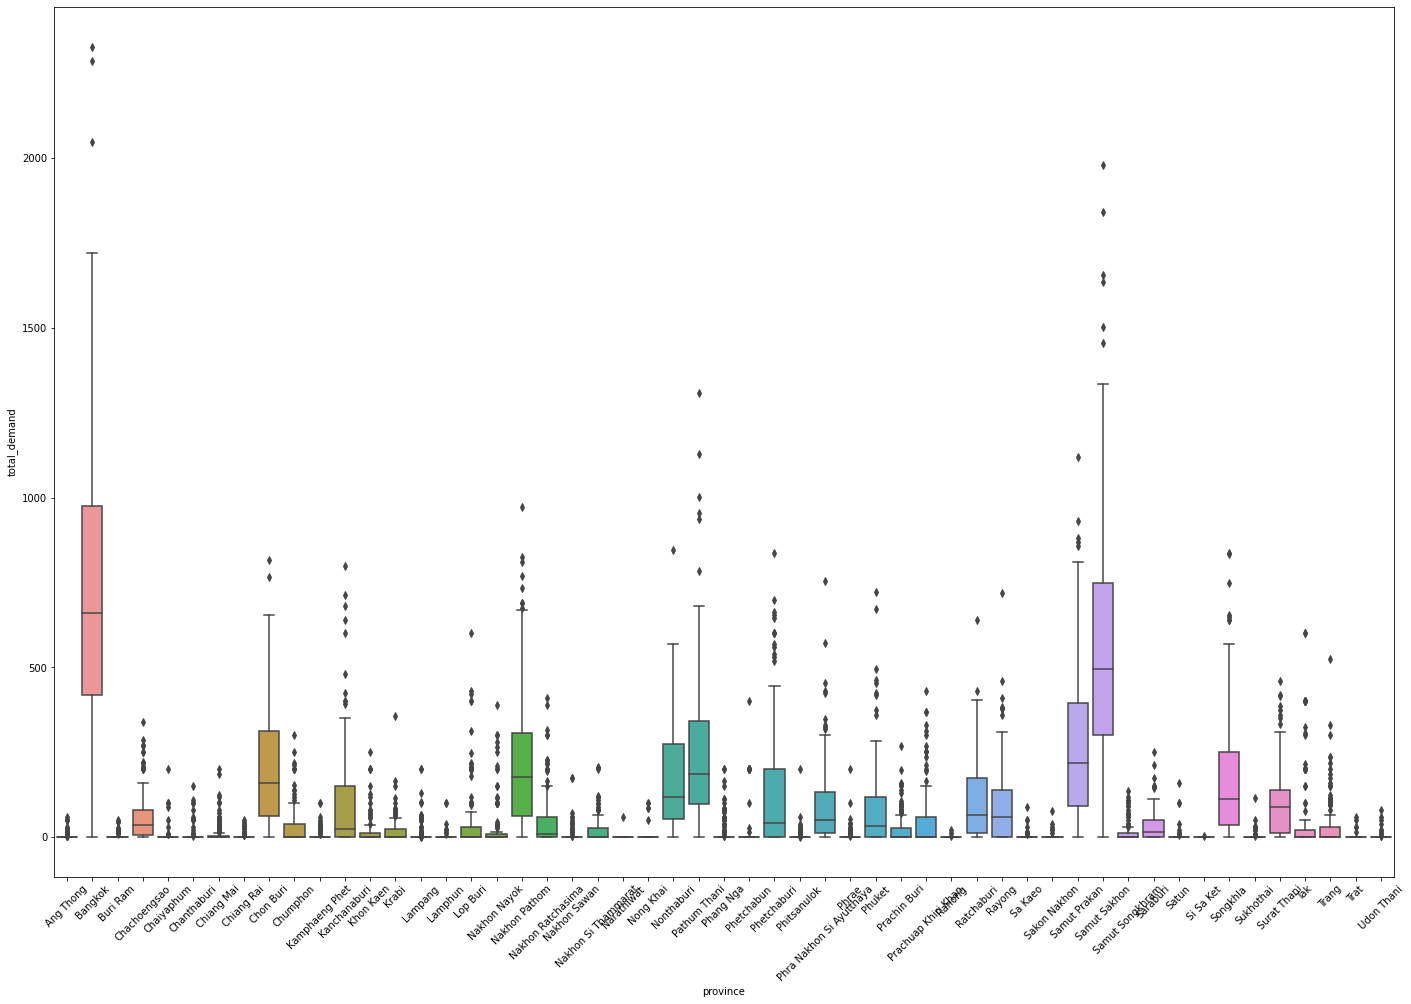

In [27]:
a4_dims = (24, 16)
fig, ax = plt.subplots(figsize=a4_dims)

df['total_demand'] = df['total_demand'].astype(float)
bxplot = sns.boxplot(data=df, x='province', y='total_demand')
for item in bxplot.get_xticklabels():
    item.set_rotation(45)
plt.show()

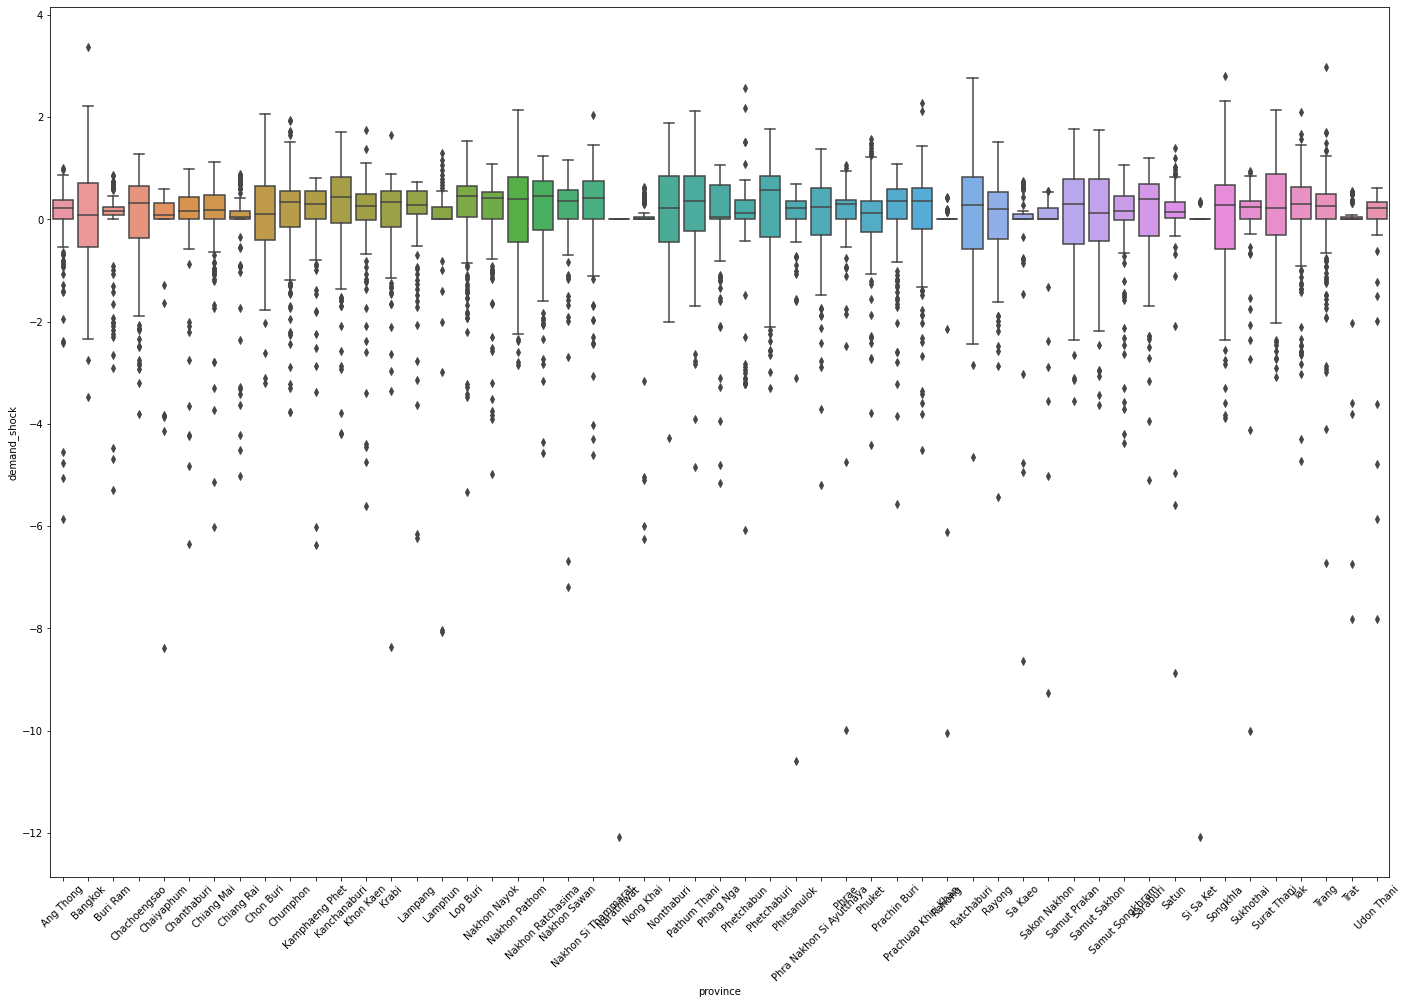

In [28]:
a4_dims = (24, 16)
fig, ax = plt.subplots(figsize=a4_dims)

df['demand_shock'] = df['demand_shock'].astype(float)
bxplot = sns.boxplot(data=df, x='province', y='demand_shock')
for item in bxplot.get_xticklabels():
    item.set_rotation(45)
plt.show()